In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

%matplotlib inline
%load_ext tensorboard
# To build CNN
from tensorflow.keras.layers import Dense, Flatten, Dropout

from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras import Model
import tensorflow_hub as hub


In [2]:
full_train = tf.data.experimental.load('D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/Data/preprocessed_data/train_full_data',
                                        element_spec=(tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), tf.TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))
full_val = tf.data.experimental.load(path='D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/Data/preprocessed_data/val_full_data',
                                      element_spec=(tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), tf.TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

In [3]:
full_train.element_spec, full_val.element_spec


((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

In [4]:
import json

with open("D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/Data/label_num_to_disease_map.json") as ds:
   disease_names = json.load(ds)

# We get dictionary from above lets convert into list
disease_names =[name for name in disease_names.values()]   
disease_names

['Cassava Bacterial Blight (CBB)',
 'Cassava Brown Streak Disease (CBSD)',
 'Cassava Green Mottle (CGM)',
 'Cassava Mosaic Disease (CMD)',
 'Healthy']


# Lets visualize images

In [5]:
# Create a function for viewing images in a data batch
def show_images(images,labels):
  """
  Displays images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(30):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(6, 6, i+1)
    # Display an image
    plt.imshow(images[i])
    # title label 
    plt.title(labels[i].argmax())
    # get rid of axis numbers
    plt.axis('off')

In [6]:
train_images, train_labels = next(full_train.as_numpy_iterator())

### Train images

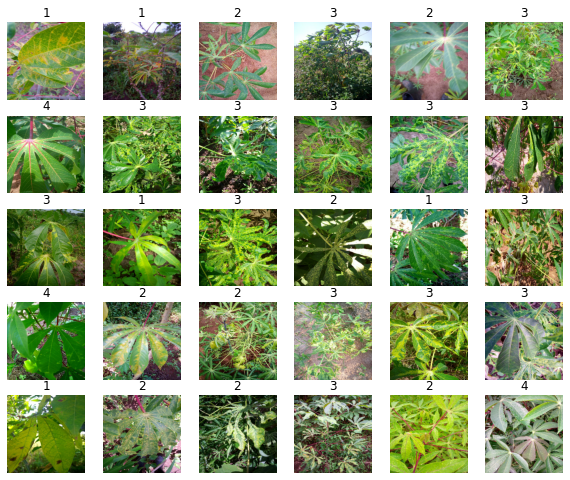

In [7]:
show_images(train_images, train_labels)

### Val Images

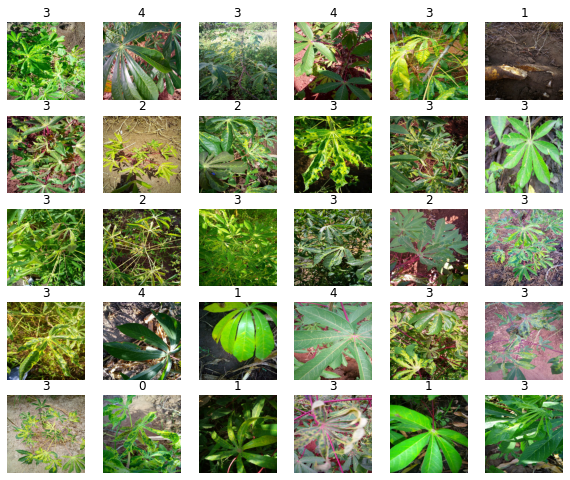

In [8]:
val_images, val_labels = next(full_val.as_numpy_iterator())
show_images(val_images, val_labels)

# Model 
>* cropnet on [tensorflow](https://www.tensorflow.org/hub/tutorials/cropnet_cassava#:~:text=This%20notebook%20shows%20how%20to,disease%2C%20healthy%2C%20or%20unknown.)
>* Cropnet cassava model on tf.hub [here](https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2)

In [9]:
MODEL_URL="https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2"

In [10]:
INPUT_SHAPE=[None,224,224,3]
OUTPUT_SHAPE=5

In [11]:
# Setup the model layers
cs_model1 = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), 
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(units=OUTPUT_SHAPE, activation="softmax")])



In [12]:
# Compile the model
cs_model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Build the model
cs_model1.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  

In [13]:
cs_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 6)                 4234118   
_________________________________________________________________
dense (Dense)                (None, 512)               3584      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [14]:
cs1_callbacks = [ModelCheckpoint("D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints/cs_best"),
                          TensorBoard("D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/Tensorboards/cs_best"),
                          EarlyStopping(patience=2, monitor='val_loss')]

In [15]:
EPOCHS = 90 #@param {type:'slider', min:10, max:100, step:10}
EPOCHS

90

In [16]:
history1= cs_model1.fit(full_train,
                     validation_data=full_val,
                     epochs=EPOCHS,
                     callbacks=cs1_callbacks,verbose=1)
cs_model1.save("D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/Model/cs_best.h5")


Epoch 1/90
535/535 [==============================] - 146s 253ms/step - loss: 0.5338 - accuracy: 0.8251 - val_loss: 0.3693 - val_accuracy: 0.8815
INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


Epoch 2/90
535/535 [==============================] - 124s 231ms/step - loss: 0.3773 - accuracy: 0.8813 - val_loss: 0.3600 - val_accuracy: 0.8822
INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


Epoch 3/90
535/535 [==============================] - 124s 232ms/step - loss: 0.3647 - accuracy: 0.8800 - val_loss: 0.3534 - val_accuracy: 0.8860
INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


Epoch 4/90
535/535 [==============================] - 125s 234ms/step - loss: 0.3626 - accuracy: 0.8801 - val_loss: 0.3469 - val_accuracy: 0.8850
INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


Epoch 5/90
535/535 [==============================] - 127s 238ms/step - loss: 0.3588 - accuracy: 0.8816 - val_loss: 0.3489 - val_accuracy: 0.8862
INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


Epoch 6/90
535/535 [==============================] - 124s 232ms/step - loss: 0.3571 - accuracy: 0.8836 - val_loss: 0.3484 - val_accuracy: 0.8843
INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


INFO:tensorflow:Assets written to: D:\Machine_learning/Convolutional_Neural_Network/Cassava_Leaf_Disease_Classification/Approch_1/calllbacks/checkpoints\cs_best\assets


In [17]:
def plot_curves(history):
    '''
    takes history as input which we get when we fit model
    Plots Loss and Accuracy curves for train and val/test set
    '''

    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

    ax1.plot(history.history["accuracy"], label=" accuracy")  # beause of label we will be able to give legend to perticular curve
    ax1.plot(history.history["val_accuracy"],label="val accuracy")
    ax1.set(title="Accuracy curve", ylabel="Percentage of correct responses")
    ax1.legend()

    ax2.plot(history.history['loss'], label="Loss") 
    ax2.plot(history.history['val_loss'], label="val loss")      
    ax2.set(title="Loss curve", xlabel="Epochs",ylabel="Percentage of loss")
    ax2.legend()

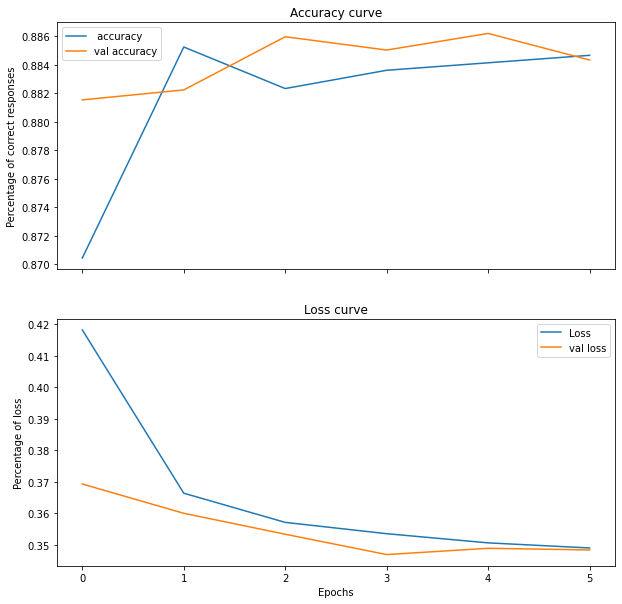

In [18]:
plot_curves(history1)

# Predictions

In [22]:
predictions= cs_model1.predict(full_val)

In [23]:
len(predictions)

4280

In [24]:
predictions[0]

array([3.8883984e-04, 3.8675693e-04, 1.5898083e-03, 9.9586630e-01,
       1.7683137e-03], dtype=float32)

In [25]:

def get_pred_label(pred_prob):
  '''
  getting name of disease from probabilities of prediction
  '''

  return disease_names[np.argmax(pred_prob)]

In [27]:
get_pred_label(predictions[0])

'Cassava Mosaic Disease (CMD)'

In [28]:
get_pred_label(predictions[653])

'Cassava Green Mottle (CGM)'

#### Our data is in form of batch we have to unbatch it to get images and true labels


In [32]:

def unbatch_data(data):

  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(disease_names[np.argmax(label)])
  return images, labels

In [33]:
val_images, val_labels =  unbatch_data(full_val)

### Create function to visualize predictions 

In [34]:
def plot_predictions(images, labels, prediction_probabilities, n=1):

  image, true_label, pred_prob =  images[n], labels[n], prediction_probabilities[n]

  pred_label =  get_pred_label(pred_prob)
   
  plt.imshow(image)

  if pred_label == true_label:
    color='green'
  else:
    color = 'red'

  plt.title("{:.2f}% :{} {}".format((np.max(pred_prob))*100, 
                                                       pred_label, true_label),
                                                      color = color )
  plt.axis('off')

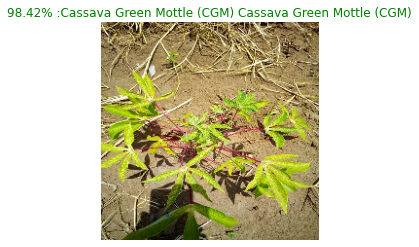

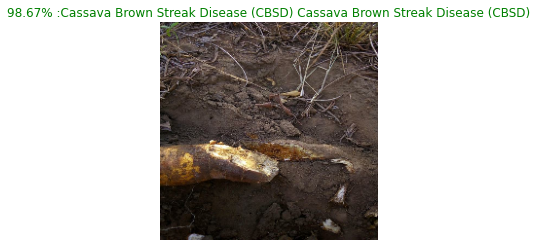

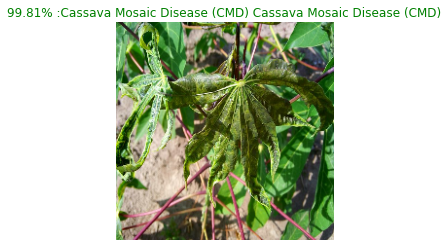

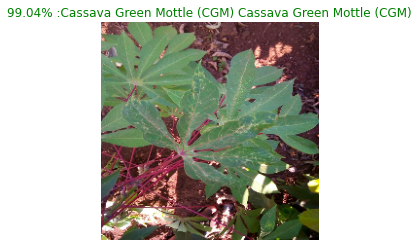

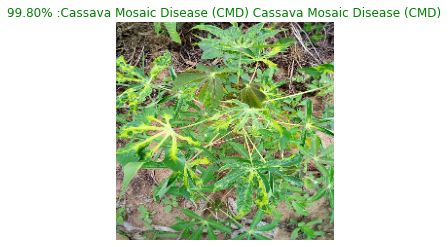

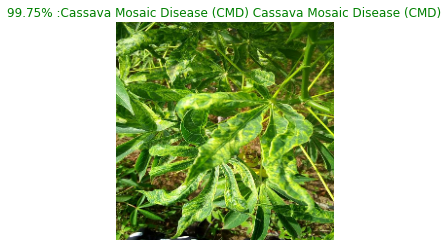

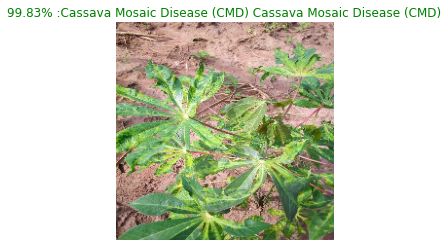

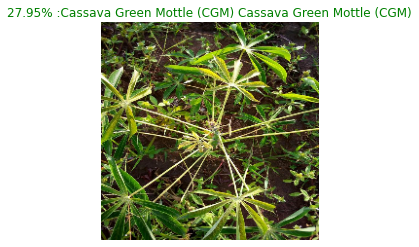

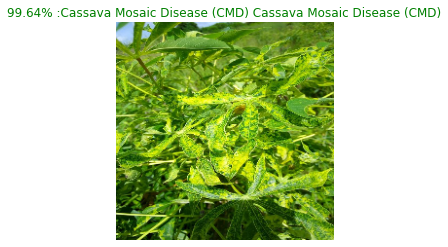

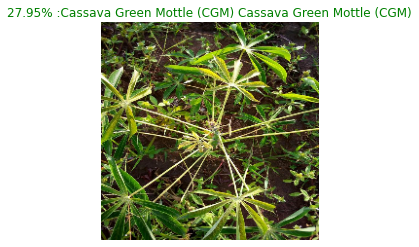

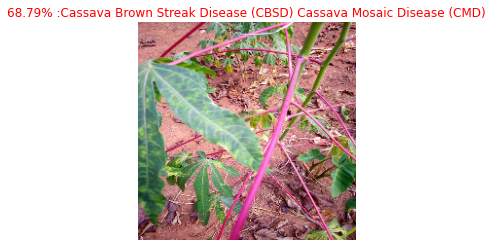

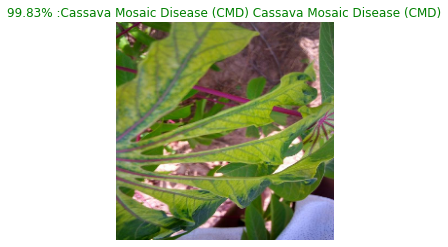

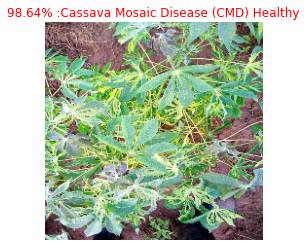

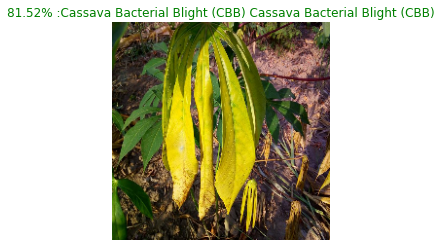

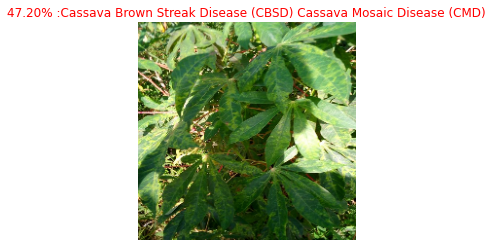

In [35]:
for i in [7,5,49,16,3387,156,963,13,968,13,56,954,789,548,2989]:        
    plot_predictions(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i)
    plt.show()